# EDA and Data cleaning - A3Data challenge

- Exploratory data analysis
- Data-cleaning
- Pipeline to automate Data-cleaning
    - ETL books_data
    - ETL books_rating

In [1]:
import pandas as pd

In [ ]:
def etl_books_data(file_path):
    data = pd.read_csv(file_path)
    print(f'Descriprion:\n{data.describe()}')
    print(f'\n\nMissing values: \n{data.isnull().sum()}')


    data = data.drop(['previewLink', 'infoLink'], axis=1)
    data = data.drop(['image'], axis=1)

    data.columns = data.columns.str.lower()

    data = data.fillna({
    'description': 'Description not available',
    'authors': "['Author not informed or not available']",
    'image': 'Image not available for this book',
    'previewlink': 'Preview link not available',
    'publisher':'Publisher not informed',
    'publisheddate': 'Date not informed',
    'infoLink': 'Info link not available',
    'categories': "['Category not informed']",
    'title': 'Title not informed for this book',
    'ratingscount': data['ratingscount'].median(),
})
    
    print(f'\n\nMissing Values now: \n{data.isnull().sum()}')

    # Show only the year of published date
    data['publisheddate'] = data['publisheddate'].str[:4]


    # remove [] from categories and author
    data['categories'] = data['categories'].str.replace('[', ' ')
    data['categories'] = data['categories'].str.replace(']', ' ')
    data['authors'] = data['authors'].str.replace('[', ' ')
    data['authors'] = data['authors'].str.replace(']', ' ')
    data['authors'] = data['authors'].str.replace("'", ' ')
    data['categories'] = data['categories'].str.replace("'", ' ')
    data['categories'] = data['categories'].str.replace(",", ' ')
    

    

    data = data.rename(columns={
    'categories': 'book_gender'
})
    # All columns to lowercase
    data.columns = data.columns.str.lower()
    
    #save to data_cleaned folder

    new_data = data.to_csv('data_cleaned/books_data_cleaned.csv', index=False)

    return new_data


In [2]:
def etl_books_rating(file_path):
    data = pd.read_csv(file_path)
    print(f'Descriprion:\n{data.describe()}')
    print(f'\n\nMissing values: \n{data.isnull().sum()}')

    data = data.drop(['Id'], axis=1)
    data = data.drop(['User_id'], axis=1)

    data.columns = data.columns.str.lower()
    data = data.rename(columns={
        'text': 'review',
        'score': 'rating',
    })

    data = data.fillna({
        'price': data['price'].median(),
        'rating': data['rating'].median(),
        'title': 'Title not informed',
        'profilename': 'Profile name not informed',
        'summary': 'Summary not informed for this book',
        'review': 'Review not informed',
    })

    data['rating'] = data['rating'].round(2)

    new_data = data.to_csv('data_cleaned/books_rating_cleaned.csv', index=False)    

    return new_data


In [3]:
etl_books_rating('Books_rating.csv')

Descriprion:
               Price         score          time
count  481171.000000  3.000000e+06  3.000000e+06
mean       21.762656  4.215289e+00  1.132307e+09
std        26.206541  1.203054e+00  1.493202e+08
min         1.000000  1.000000e+00 -1.000000e+00
25%        10.780000  4.000000e+00  9.999072e+08
50%        14.930000  5.000000e+00  1.128298e+09
75%        23.950000  5.000000e+00  1.269130e+09
max       995.000000  5.000000e+00  1.362355e+09


Missing values: 
Id                   0
Title              208
Price          2518829
User_id         561787
profileName     561905
score                0
time                 0
summary            407
text                 8
dtype: int64


In [ ]:
# generate a function to load and transform the rating data

def etl_books_rating(file_path):
    data = pd.read_csv(file_path)
    print(f'Descriprion:\n{data.describe()}')
    print(f'\n\nMissing values: \n{data.isnull().sum()}')

    data = data.drop(['Id'], axis=1)
    data = data.drop(['User_id'], axis=1)

    data.columns = data.columns.str.lower()

    data = data.fillna({
    'title': 'Title not informed',
    'price': data['price'].median(),
    'profilename': 'profilename not informed',
    'summary': 'Description not available',
    'text': 'Review not available',
})
    
    data = data.rename(columns={
    'text': 'review'
})
    
    data['score'] = data['score'].round(2)

    print(f'\n\nMissing Values now: \n{data.isnull().sum()}')

    new_data = data.to_csv('data_cleaned/books_rating_cleaned.csv', index=False)

    return new_data


Descriprion:
               Price         score          time
count  481171.000000  3.000000e+06  3.000000e+06
mean       21.762656  4.215289e+00  1.132307e+09
std        26.206541  1.203054e+00  1.493202e+08
min         1.000000  1.000000e+00 -1.000000e+00
25%        10.780000  4.000000e+00  9.999072e+08
50%        14.930000  5.000000e+00  1.128298e+09
75%        23.950000  5.000000e+00  1.269130e+09
max       995.000000  5.000000e+00  1.362355e+09


Missing values: 
Id                   0
Title              208
Price          2518829
User_id         561787
profileName     561905
score                0
time                 0
summary            407
text                 8
dtype: int64


Missing Values now: 
title          0
price          0
profilename    0
score          0
time           0
summary        0
review         0
dtype: int64


In [7]:
df = pd.read_csv('data_cleaned/books_rating_cleaned.csv')

df.head()


,title,price,profilename,rating,time,summary,review
0,Its Only Art If Its Well Hung!,14.93,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,14.93,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,14.93,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,14.93,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,14.93,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


,title,price,profilename,rating,time,summary,review
0,Its Only Art If Its Well Hung!,14.93,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,14.93,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,14.93,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,14.93,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,14.93,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,Dr. Seuss: American Icon,14.93,Malvin,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,Dr. Seuss: American Icon,14.93,Midwest Book Review,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
7,Dr. Seuss: American Icon,14.93,J. Squire,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
8,Dr. Seuss: American Icon,14.93,"J. P. HIGBED ""big fellow""",5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...
9,Dr. Seuss: American Icon,14.93,Donald Burnside,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l..."


In [2]:
df_data = pd.read_csv('data_cleaned/books_data_cleaned.csv')
df_rating = pd.read_csv('data_cleaned/books_rating_cleaned.csv')

In [3]:
df_rating = df_rating.drop(columns=['time'])

In [4]:
# reduce datasets to 1000 rows and save it as books_data_sample.csv and books_rating_sample.csv

df_data = df_data.head(1000)
df_rating = df_rating.head(1000)

df_data.to_csv('data_cleaned/books_data_sample.csv', index=False)
df_rating.to_csv('data_cleaned/books_rating_sample.csv', index=False)

print('Data Sample Created')

Data Sample Created


In [5]:
df1 = pd.read_csv('data_cleaned/books_data_sample.csv')
df2 = pd.read_csv('data_cleaned/books_rating_sample.csv')

In [7]:
# Ensure the column names are in lowercase
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

engajamento_por_genero = df1.groupby('book_gender')['ratingscount'].mean()

# Calcular o detalhamento dos feedbacks por gênero
df2['review_length'] = df2['review'].apply(len)
detalhamento_por_genero = df2.groupby('book_gender')['review_length'].mean()

# Comparar os resultados
resultados = pd.DataFrame({
    'Engajamento': engajamento_por_genero,
    'Detalhamento': detalhamento_por_genero
})

print(resultados)

KeyError: 'book_gender'

In [3]:
print("Data types of columns in df:")
print(df.dtypes)

print("\nData types of columns in df_rating:")
print(df_rating.dtypes)

Data types of columns in df:
title             object
description       object
authors           object
publisher         object
publisheddate     object
book_gender       object
ratingscount     float64
dtype: object

Data types of columns in df_rating:
title           object
price          float64
profilename     object
rating         float64
summary         object
review          object
dtype: object


In [3]:
# lowest score

lowest_score = df_rating['score'].min()

KeyError: 'score'

In [10]:
df.head()

,title,description,authors,publisher,publisheddate,book_gender,ratingscount
0,Its Only Art If Its Well Hung!,Description not available,Julie Strain,Publisher not informed,1996,Comics & Graphic Novels,2.0
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography,2.0
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R. Ray,Publisher not informed,2000,Religion,2.0
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,iUniverse,2005,Fiction,2.0
4,"Nation Dance: Religion, Identity and Cultural ...",Description not available,Edward Long,Publisher not informed,2003,Category not informed,2.0


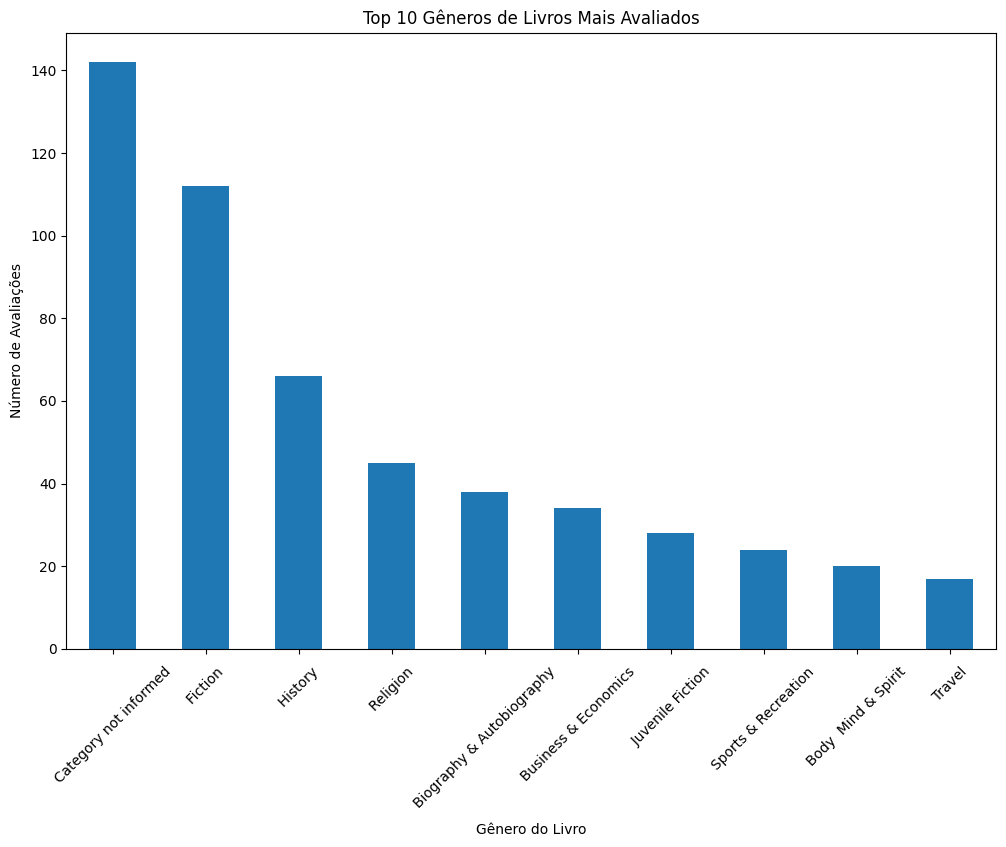

In [5]:
import matplotlib.pyplot as plt

# Contar o número de avaliações por gênero de livro
top_10_book_genders = df['book_gender'].value_counts().head(10)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
top_10_book_genders.plot(kind='bar')
plt.title('Top 10 Gêneros de Livros Mais Avaliados')
plt.xlabel('Gênero do Livro')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Aqui estão algumas sugestões de plots que você pode criar com os dados disponíveis:

1. **Distribuição de Avaliações por Gênero de Livro**:
    ```python
    plt.figure(figsize=(12, 8))
    df['book_gender'].value_counts().plot(kind='bar')
    plt.title('Distribuição de Avaliações por Gênero de Livro')
    plt.xlabel('Gênero do Livro')
    plt.ylabel('Número de Avaliações')
    plt.xticks(rotation=45)
    plt.show()
    ```

2. **Distribuição de Preços dos Livros**:
    ```python
    plt.figure(figsize=(12, 8))
    df_rating['price'].plot(kind='hist', bins=20)
    plt.title('Distribuição de Preços dos Livros')
    plt.xlabel('Preço')
    plt.ylabel('Frequência')
    plt.show()
    ```

3. **Média de Avaliações por Gênero de Livro**:
    ```python
    avg_rating_by_gender = df_rating.groupby(df['book_gender'])['rating'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    avg_rating_by_gender.plot(kind='bar')
    plt.title('Média de Avaliações por Gênero de Livro')
    plt.xlabel('Gênero do Livro')
    plt.ylabel('Média de Avaliações')
    plt.xticks(rotation=45)
    plt.show()
    ```

4. **Número de Livros por Ano de Publicação**:
    ```python
    plt.figure(figsize=(12, 8))
    df['publisheddate'].value_counts().sort_index().plot(kind='line')
    plt.title('Número de Livros por Ano de Publicação')
    plt.xlabel('Ano de Publicação')
    plt.ylabel('Número de Livros')
    plt.show()
    ```

5. **Top 10 Autores com Mais Livros**:
    ```python
    top_10_authors = df['authors'].value_counts().head(10)
    plt.figure(figsize=(12, 8))
    top_10_authors.plot(kind='bar')
    plt.title('Top 10 Autores com Mais Livros')
    plt.xlabel('Autor')
    plt.ylabel('Número de Livros')
    plt.xticks(rotation=45)
    plt.show()
    ```

Escolha um ou mais desses plots para visualizar melhor os dados do seu conjunto.

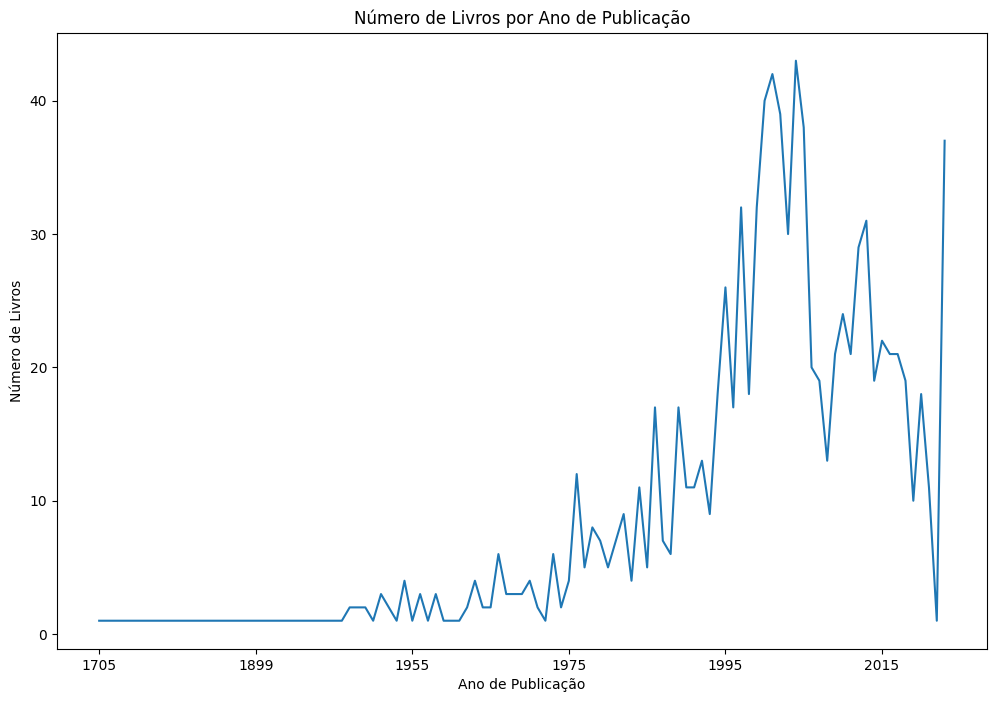

In [8]:
plt.figure(figsize=(12, 8))
df['publisheddate'].value_counts().sort_index().plot(kind='line')
plt.title('Número de Livros por Ano de Publicação')
plt.xlabel('Ano de Publicação')
plt.ylabel('Número de Livros')
plt.show()

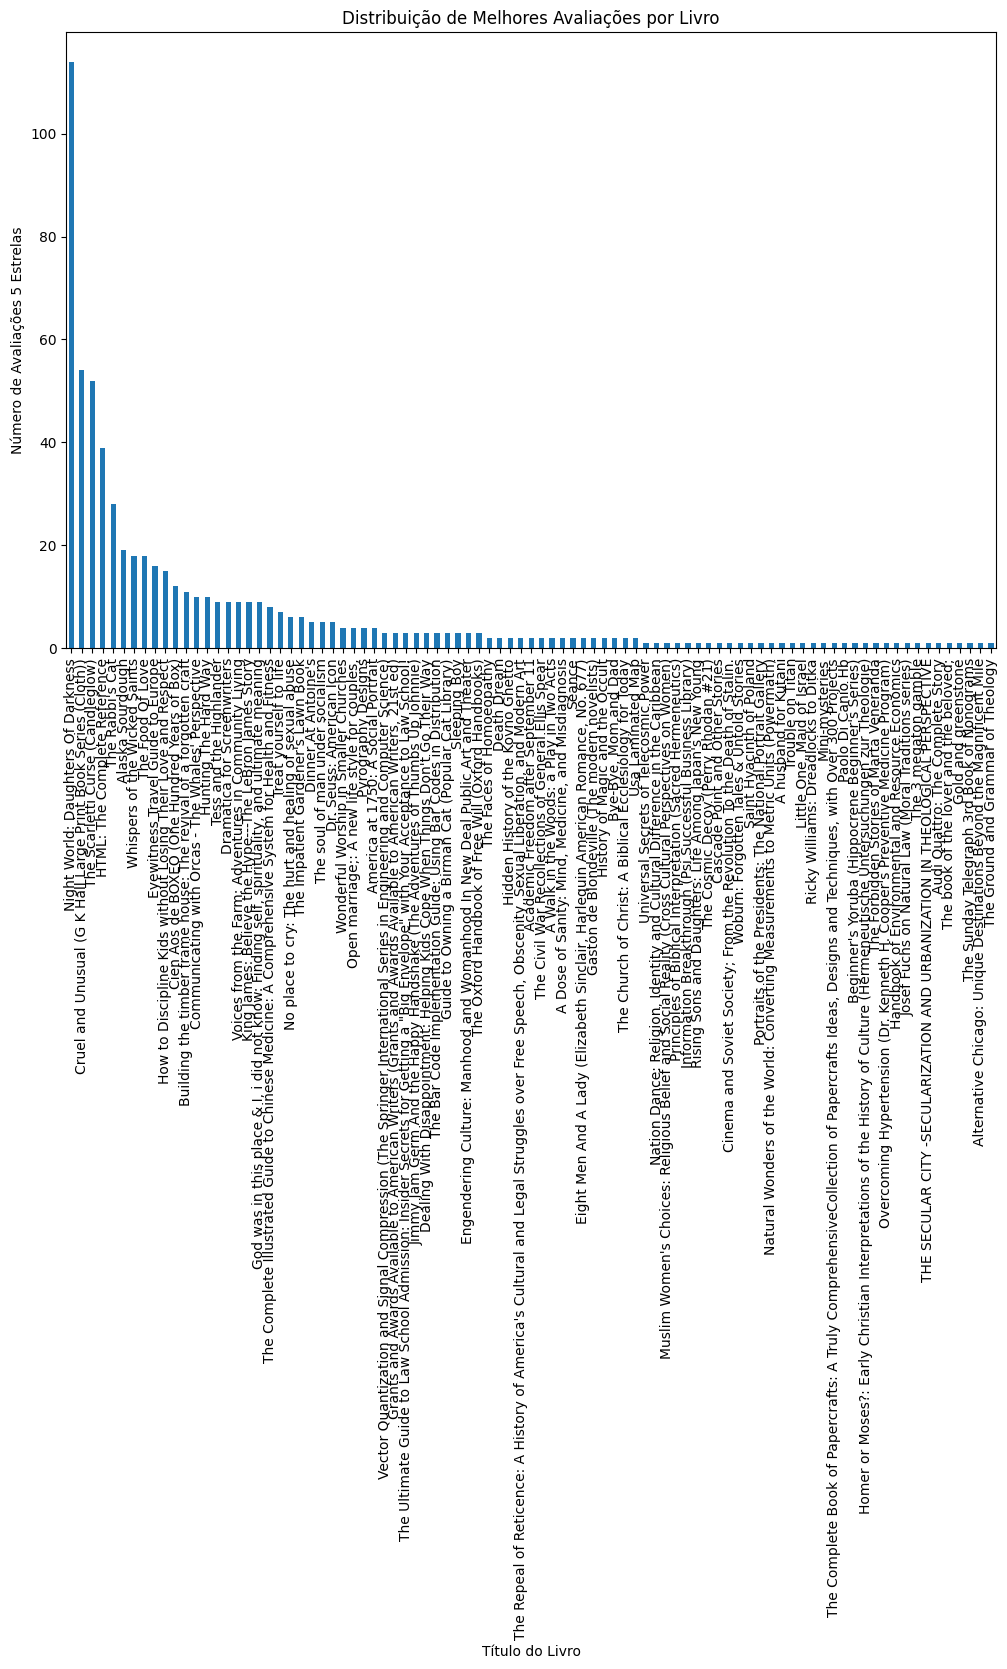

In [11]:
plt.figure(figsize=(12, 8))
df_rating[df_rating['rating'] == 5]['title'].value_counts().plot(kind='bar')
plt.title('Distribuição de Melhores Avaliações por Livro')
plt.xlabel('Título do Livro')
plt.ylabel('Número de Avaliações 5 Estrelas')
plt.xticks(rotation=90)
plt.show()

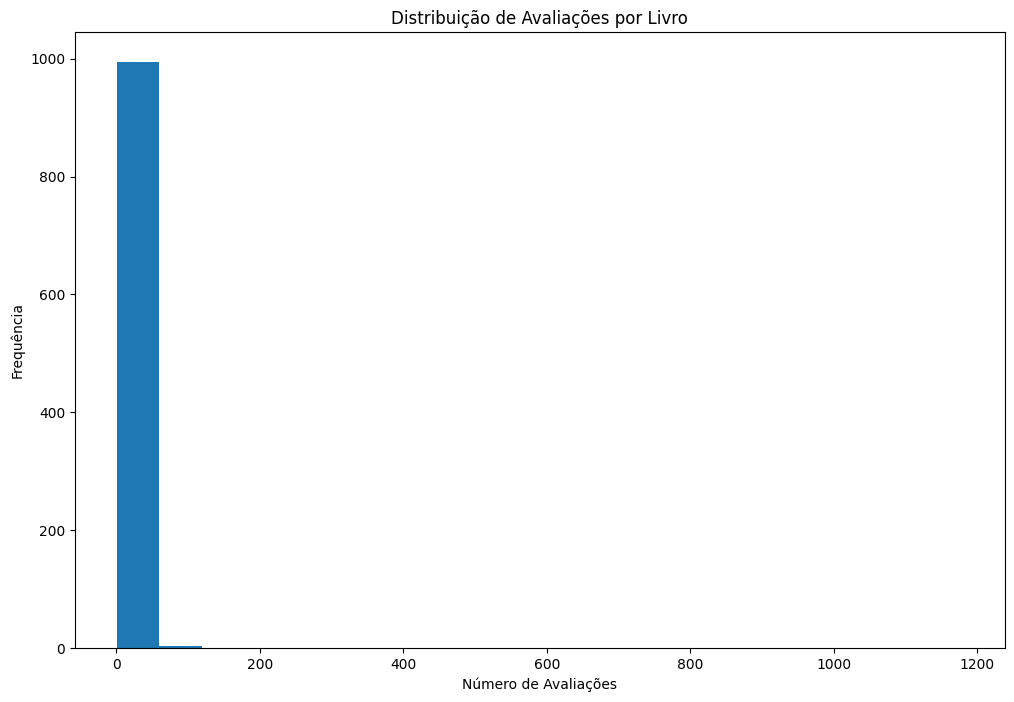

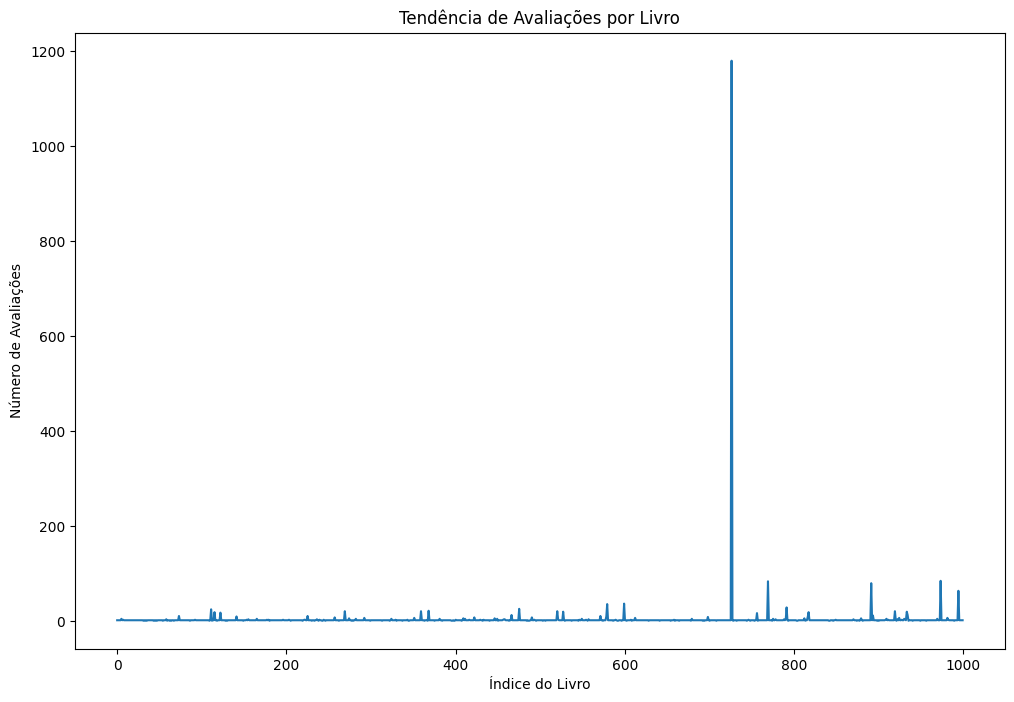

In [9]:
import matplotlib.pyplot as plt

# Plotar o gráfico de tendência de avaliações por livro
plt.figure(figsize=(12, 8))
df['ratingscount'].plot(kind='line')
plt.title('Tendência de Avaliações por Livro')
plt.xlabel('Índice do Livro')
plt.ylabel('Número de Avaliações')
plt.show()

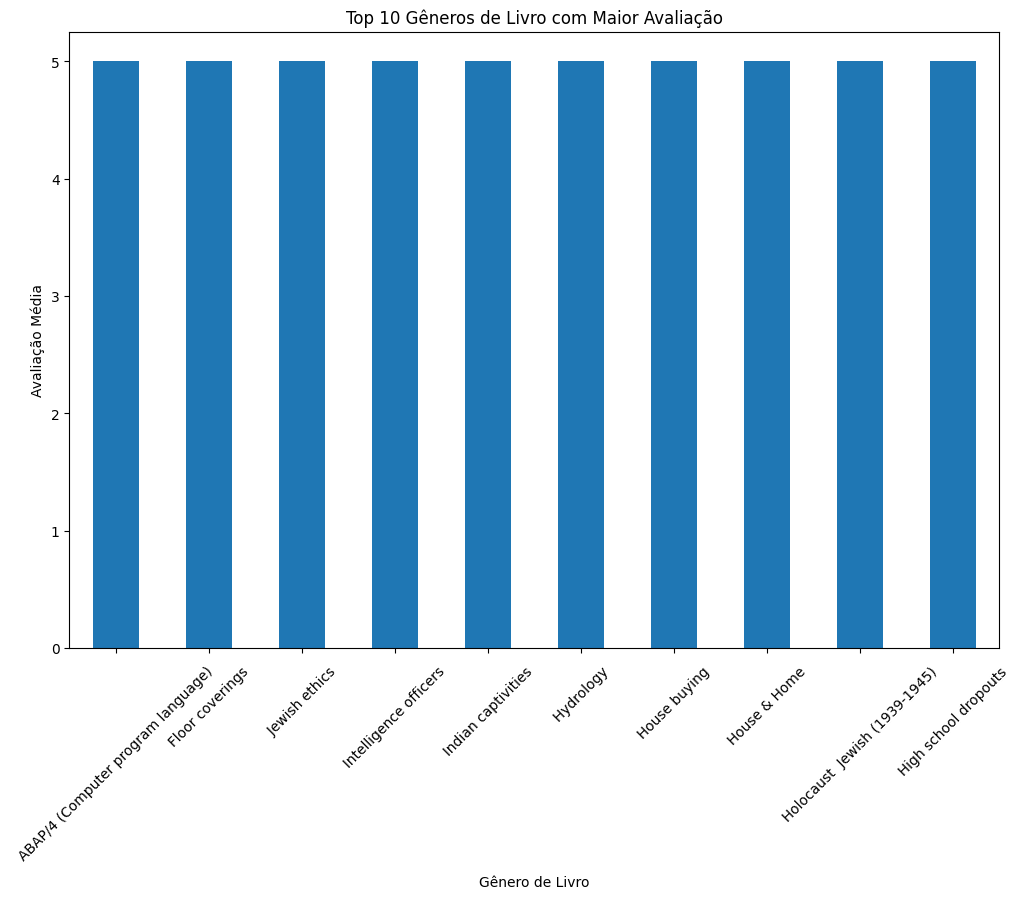

book_gender
 ABAP/4 (Computer program language)                5.0
 Abortion counseling                               5.0
 Accounting                                        5.0
 Acteurs de cinéma - États-Unis - Biographies      5.0
 Adventure stories                                 5.0
                                                  ... 
 Young Adult Fiction                               4.0
 Youth                                             5.0
"Artists  materials"                               5.0
"Children s libraries"                             2.0
"Children s literature"                            4.0
Name: rating, Length: 213, dtype: float64


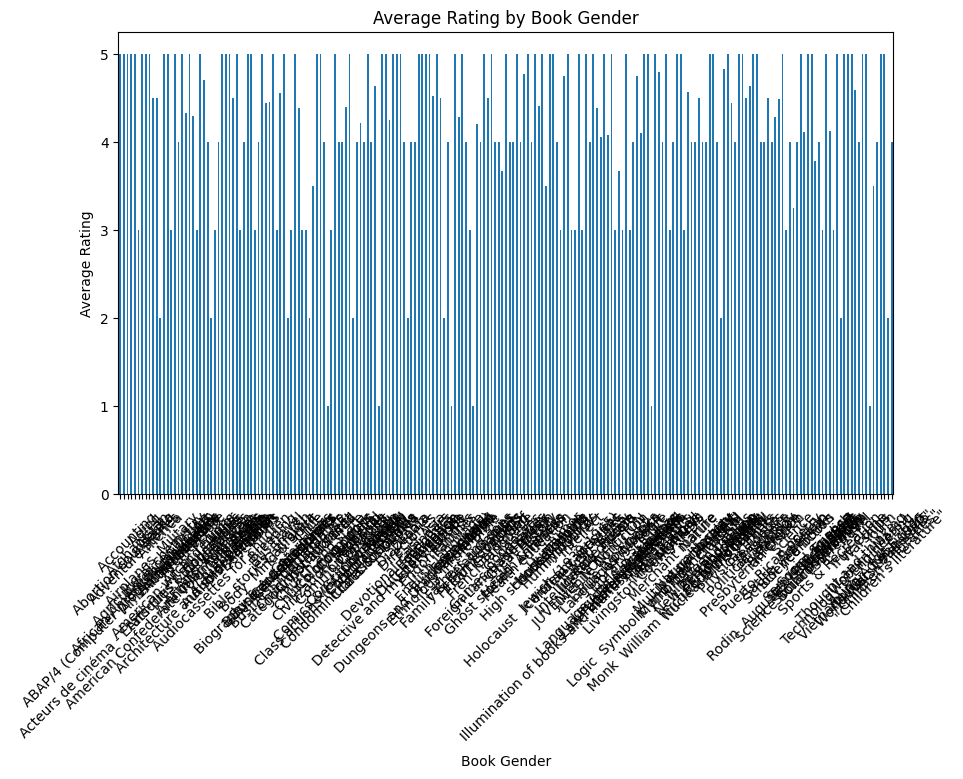

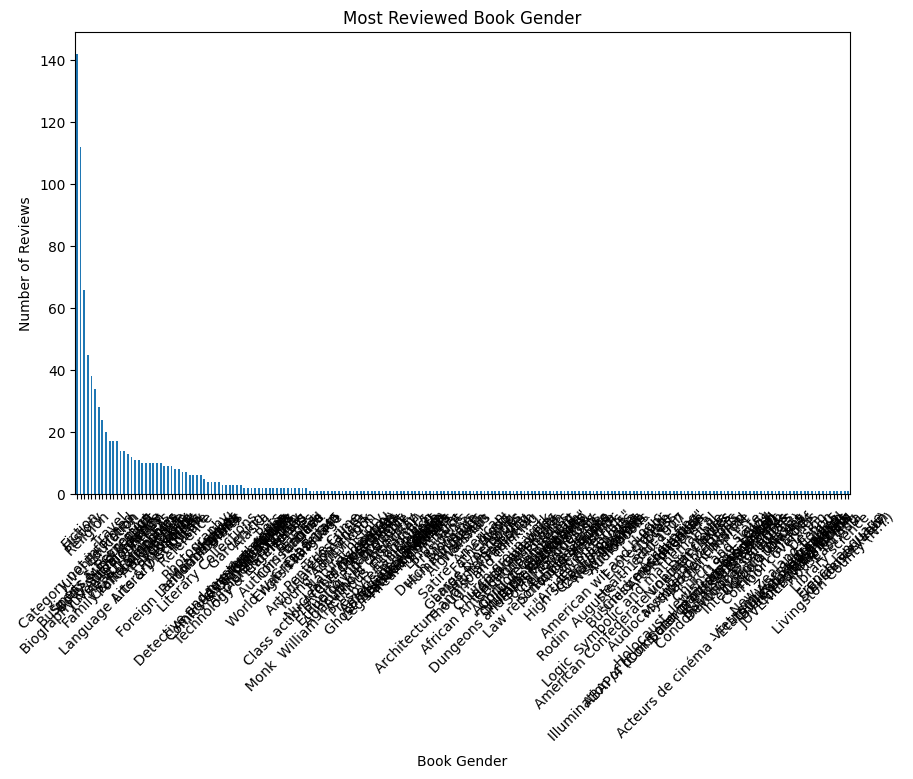

In [12]:
import matplotlib.pyplot as plt

# Count the number of reviews per book gender
book_gender_counts = df_data['book_gender'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
book_gender_counts.plot(kind='bar')
plt.title('Most Reviewed Book Gender')
plt.xlabel('Book Gender')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()